In [2]:
from google.colab import drive
drive.mount('/content/drive')
from numpy import array
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
import keras
from keras import regularizers, optimizers

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
img_width, img_height = 150, 150
train_data_dir = '/content/drive/My Drive/Gatos2'

nb_train_samples = 2463   
nb_validation_samples = 615  
epochs = 220
batch_size = 128
if K.image_data_format() == 'wa':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [4]:
datagen = ImageDataGenerator(
    width_shift_range=0.3,
    height_shift_range=0.3,
    channel_shift_range=0.3,
    vertical_flip=True,
    brightness_range=(0.3, 1.4),
    fill_mode="nearest",
    rescale=1./255,
    rotation_range=180,
    zoom_range=[0.9, 1.25],
    validation_split=0.2,
    shear_range=0.5
)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)


validation_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode='categorical',
    subset='validation'
)

Found 2463 images belonging to 9 classes.
Found 615 images belonging to 9 classes.


In [5]:
classifier = keras.Sequential()

classifier.add(keras.layers.Conv2D(40, (3, 3), input_shape = [150,150,3], activation = 'relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

classifier.add(keras.layers.Conv2D(80, (5, 5), activation = 'relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

classifier.add(keras.layers.Conv2D(120, (3, 3), activation = 'relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
classifier.add(keras.layers.Dropout(0.25))

classifier.add(keras.layers.Conv2D(80, (3, 3), activation = 'relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))


classifier.add(keras.layers.Flatten())

classifier.add(keras.layers.Dense(units = 128, activation = 'relu'))
classifier.add(keras.layers.Dropout(0.25))

classifier.add(keras.layers.Dense(units = 9, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size

W0816 00:36:48.330908 139837429344128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0816 00:36:48.355548 139837429344128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 00:36:48.358717 139837429344128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0816 00:36:48.374364 139837429344128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0816 00:36:48.402631 139837429344128 deprecation_wrapp

In [6]:
hist = classifier.fit_generator(
    generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=epochs
)

W0816 00:36:50.995506 139837429344128 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/220
19/19 [==============================] - 542s 29s/step - loss: 1.9181 - acc: 0.4363 - val_loss: 1.8464 - val_acc: 0.4492
Epoch 2/220
19/19 [==============================] - 33s 2s/step - loss: 1.8415 - acc: 0.4547 - val_loss: 1.7974 - val_acc: 0.4784
Epoch 3/220
19/19 [==============================] - 30s 2s/step - loss: 1.8170 - acc: 0.4592 - val_loss: 1.8212 - val_acc: 0.4497
Epoch 4/220
19/19 [==============================] - 30s 2s/step - loss: 1.8141 - acc: 0.4591 - val_loss: 1.8376 - val_acc: 0.4333
Epoch 5/220
19/19 [==============================] - 30s 2s/step - loss: 1.8089 - acc: 0.4572 - val_loss: 1.7580 - val_acc: 0.4825
Epoch 6/220
19/19 [==============================] - 30s 2s/step - loss: 1.7769 - acc: 0.4646 - val_loss: 1.7974 - val_acc: 0.4414
Epoch 7/220
19/19 [==============================] - 30s 2s/step - loss: 1.7739 - acc: 0.4641 - val_loss: 1.7567 - val_acc: 0.4600
Epoch 8/220
19/19 [==============================] - 30s 2s/step - loss: 1.8061 -

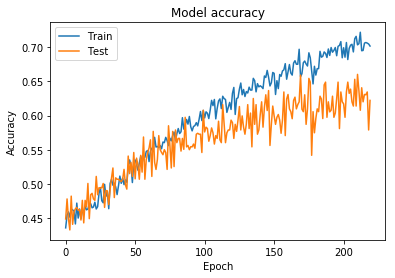

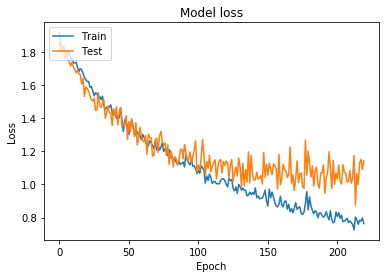

In [7]:
# Accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()